In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path to your dataset in Google Drive
file_path = '//content/drive/MyDrive/Dataset/clusteringweek06.csv'
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


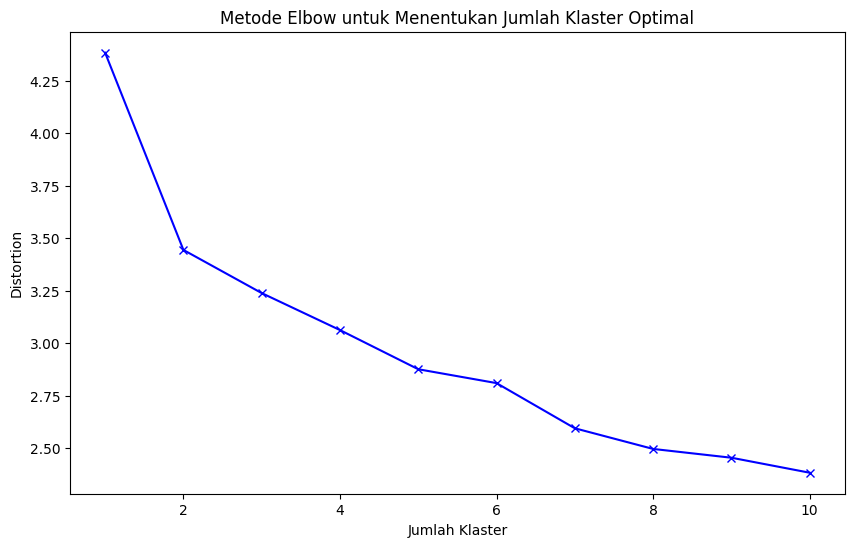

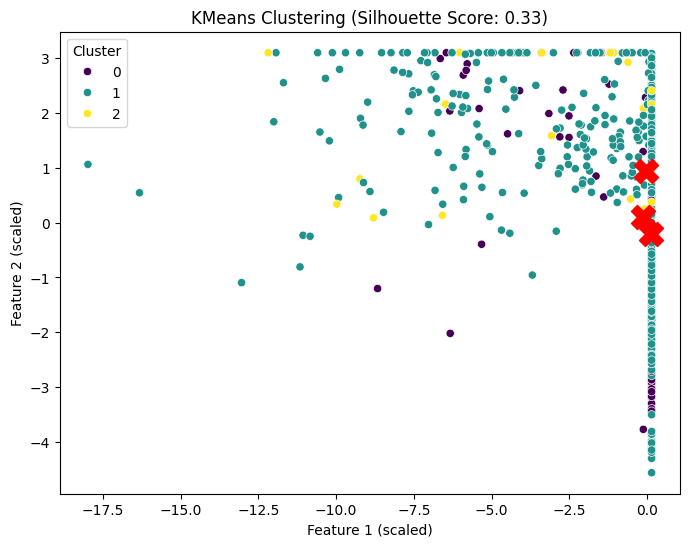

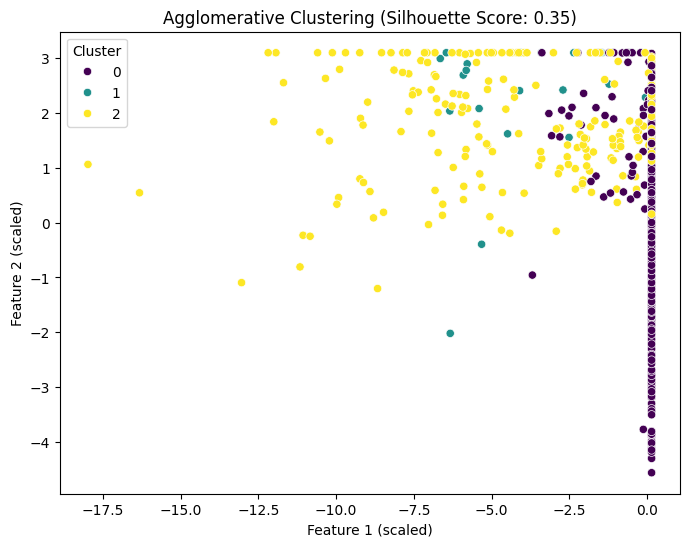

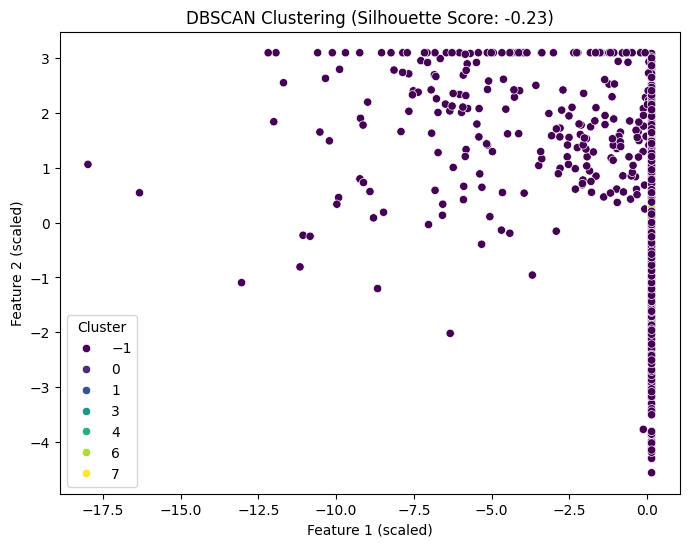

Silhouette Score KMeans: 0.33
Silhouette Score Agglomerative Clustering: 0.35
Silhouette Score DBSCAN: -0.23
Model terbaik berdasarkan silhouette score adalah Agglomerative Clustering dengan score 0.35


In [4]:
# Data Preprocessing
# Hapus data yang memiliki nilai null
df = df.dropna()
# Menggunakan hanya kolom numerik yang diperlukan untuk clustering
# Asumsi kolom numerik ada di kolom tertentu, ganti 'Col1', 'Col2', ... sesuai dengan nama kolom dataset
X = df.select_dtypes(include=[np.number])

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function untuk menentukan knee point pada KMeans
def calculate_knee(X):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    plt.figure(figsize=(10,6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Jumlah Klaster')
    plt.ylabel('Distortion')
    plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
    plt.show()

# Hitung elbow untuk KMeans
calculate_knee(X_scaled)

# Model 1: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# Visualisasi hasil KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f'KMeans Clustering (Silhouette Score: {kmeans_silhouette:.2f})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(title='Cluster')
plt.show()

# Model 2: Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)

# Visualisasi hasil Agglomerative Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agglo_labels, palette='viridis')
plt.title(f'Agglomerative Clustering (Silhouette Score: {agglo_silhouette:.2f})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(title='Cluster')
plt.show()

# Model 3: DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Menghitung silhouette score untuk DBSCAN jika terdapat lebih dari satu cluster
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
else:
    dbscan_silhouette = -1  # Silhouette score tidak valid

# Visualisasi hasil DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title(f'DBSCAN Clustering (Silhouette Score: {dbscan_silhouette:.2f})')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(title='Cluster')
plt.show()

# Kesimpulan: Bandingkan nilai silhouette score
print(f'Silhouette Score KMeans: {kmeans_silhouette:.2f}')
print(f'Silhouette Score Agglomerative Clustering: {agglo_silhouette:.2f}')
print(f'Silhouette Score DBSCAN: {dbscan_silhouette:.2f}')

# Tentukan model terbaik berdasarkan silhouette score
if kmeans_silhouette > agglo_silhouette and kmeans_silhouette > dbscan_silhouette:
    best_model = 'KMeans'
    best_score = kmeans_silhouette
elif agglo_silhouette > dbscan_silhouette:
    best_model = 'Agglomerative Clustering'
    best_score = agglo_silhouette
else:
    best_model = 'DBSCAN'
    best_score = dbscan_silhouette

print(f'Model terbaik berdasarkan silhouette score adalah {best_model} dengan score {best_score:.2f}')